Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[[  19.645752   54.306858 1013.2923     73.281456]]
First example: [[  28.66   77.95 1009.56   69.07]]

Normalized: [[ 1.21  1.86 -0.63 -0.29]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
CPU times: user 39.6 s, sys: 3.09 s, total: 42.7 s
Wall time: 50.7 s


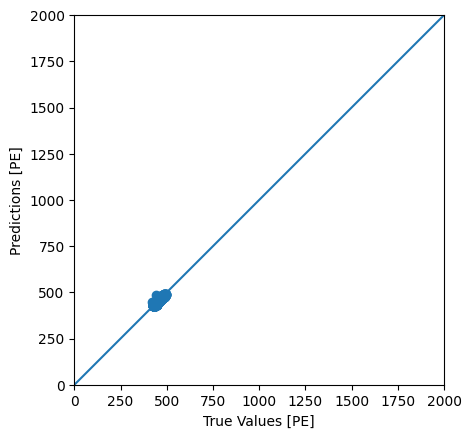

In [ ]:
%%time
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.keras import layers

raw_dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/lab02.csv")
dataset = raw_dataset.copy()
dataset.tail()
dataset.isna().sum()
dataset = dataset.dropna()
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
# sns.pairplot(train_dataset[['PE', 'AT', 'V', 'AP','RH']], diag_kind='kde')
train_dataset.describe().transpose()
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('PE')
test_labels = test_features.pop('PE')
train_dataset.describe().transpose()[['mean', 'std']]
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [PE]')
  plt.legend()
  plt.grid(True)

test_results = {}

linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
linear_model.predict(train_features[:10])
linear_model.layers[1].kernel
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

# plot_loss(history)

#Save a key array value pair to the test_results set to record its test set performance
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

#Checking all models's performance
# pd.DataFrame(test_results, index=['Mean absolute error [PE]']).T

#Predicting
test_predictions = linear_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [PE]')
plt.ylabel('Predictions [PE]')
lims = [0, 2000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

#Error checking
# error = test_predictions - test_labels
# plt.hist(error, bins=25)
# plt.xlabel('Prediction Error [PE]')
# _ = plt.ylabel('Count')